Purpose of this notebook:

1. Enable quick manual segmentation of large TIF images containing multiple tiles in x-y and multiple z-planes, in a single channel
2. Create a table of cells X ROIs also containing information about the location of the cell in vivo (within a particular FOV)
3. Allow each cell to have ROIs in multiple z planes
4. Work with single image stitched in x-y if possible
5. Use ROIs from one channel to calculate intensity in other channels and produce histogram

Make sure notebook is opened in py365 environment

# Setup

In [16]:
%gui qt5 

In [17]:
# Imports in alphabetical order of module name

from IPython.display import display
from PIL import Image, ImageDraw
import napari
import numpy as np
import pickle as pkl
import matplotlib.path as mpltpath
import matplotlib.pyplot as plt


# Load images

## Segmentation channel

In [18]:
## Specify images to load

# folder2 = 'Z:\HCR\9.2_FISH\S1_dapi_546_488_647'
folder = 'Z:\HCR\9.2_FISH\S1_16bit\S1_dapi_546_488_647'

# base_filename2 = 'S1_dapi_546_488_647_s2z'
base_filename = 'S1_dapi_546_488_647_s2z'

plane_nos = range(1, 29)
n = len(plane_nos)
print('Number of planes: {0}'.format(n))

Number of planes: 28


In [19]:
# Create 4D array to store images
img = Image.open('{0}\{1}{2}c2_ORG.tif'.format(folder, base_filename, str(plane_nos[0]).zfill(2)))
# img2 = Image.open('{0}\{1}{2}c1+2+3+4.tif'.format(folder2, base_filename2, str(plane_nos[0]).zfill(2)))

h = img.height
# h2 = img2.height                  
                  
w = img.width
# w2 = img2.width
                  
# c = np.array(img).shape[2]
im_array = np.zeros([n, h, w])
# im_array2 = np.zeros([n, h2, w2])
print('Size of image in pixels: {0} X {1} X {2}'.format(n, h, w))

for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c2_ORG.tif'.format(folder, base_filename, str(p).zfill(2)))
#     img2 = Image.open('{0}\{1}{2}c1+2+3+4.tif'.format(folder2, base_filename2, str(p).zfill(2)))
    try:
        im_array[i, :, :] = np.array(img)
#         im_array2[i, :, :] = np.array(img2)[:, :, 0]
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue


Size of image in pixels: 28 X 2360 X 4200
Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28


## Load other channels

### Without background subtraction

In [13]:
im_array_egln3 = np.zeros([n, h, w])
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c4_ORG.tif'.format(folder, base_filename,str(p).zfill(2)))
    try:
        im_array_egln3[i, :, :] = np.array(img)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_egln3 = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28


In [14]:
im_array_npy = np.zeros([n, h, w])
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c3_ORG.tif'.format(folder, base_filename,str(p).zfill(2)))
    try:
        im_array_npy[i, :, :] = np.array(img)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_npy = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28


### With background subtraction

In [24]:
im_array_egln3 = np.zeros([n, h, w])
img_file = 's1_c4_647_egln3_background_subtracted'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_egln3[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_egln3 = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28


In [23]:
im_array_npy = np.zeros([n, h, w])
img_file = 'S1_c3_488_npy_background_subtracted'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_npy[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_npy = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28


# Annotation

## Data structure to store information about cells

In [25]:
class Cell:
    n_cells = 1
    cell_data = {}
    
    def __init__(self, cell_no):
        
        self.cell_no = cell_no
        self.z_planes = []
        self.no_planes = 0
        self.masks = {}
        self.c_vals = np.zeros(1)
        print('Cell #{0} created'.format(Cell.n_cells))
        
    def add_mask(self, z_plane, mask):
        self.z_planes.append(z_plane)
        self.no_planes += 1
        self.masks[z_plane] = mask
            
    def save_cell(self):
        Cell.cell_data[self.cell_no] = {'cell_id': self.cell_no,
                                 'z_planes': self.z_planes,
                                 'masks': self.masks,
                                 'no_planes': self.no_planes,
                                 'c_vals':self.c_vals}

In [26]:
# Load masks if they already exist
save_loc = 'Z:\HCR\9.2_FISH'
save_file= 'S1_data.pkl'
try:
    with open('{0}\{1}'.format(save_loc, save_file), 'rb') as f:
        Cell.cell_data = pkl.load(f)
        indices = list(Cell.cell_data.keys())
        if not np.max(indices) == len(indices):
            print('Re-numbering cells to be consecutive')
            Cell.cell_data_temp = {}
            for i in range(len(indices)):
                Cell.cell_data_temp[i + 1] = Cell.cell_data[indices[i]]
                Cell.cell_data_temp[i + 1]['cell_id'] = i + 1
            Cell.cell_data = Cell.cell_data_temp 
            with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)
            Cell.n_cells = i + 1
        else:
            Cell.n_cells = len(indices)
    print('{0} cells found'.format(Cell.n_cells))
except:
    print('No data found')

203 cells found


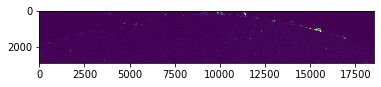

In [8]:
plt.figure()
plt.imshow(im_array[5, :, :])

In [9]:
viewer2 = napari.Viewer()

In [10]:
viewer.add_image(im_array[0, :, :])

<Image layer 'Image' at 0x1cf4f7b8>

## Render image in napari GUI

In [15]:
# Open image in napari viewer - each channel as a separate layer 
viewer = napari.Viewer()

viewer.add_image(im_array[:, :, :], name = 'Channel {0}'.format(i + 1), colormap = 'viridis', 
                     interpolation = 'nearest')
    
seg_channel = 0
viewer.add_shapes([], name = 'masks', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)

# Add existing masks
indices = list(Cell.cell_data.keys())
mask_layer = viewer.layers['masks']
for cell in indices:
    plane = Cell.cell_data[cell]['z_planes'][0]
    mask = Cell.cell_data[cell]['masks'][plane]
    mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)

# Keybinding functions

@viewer.bind_key('n')
def new_cell(viewer):
    global cell1 
    Cell.n_cells += 1
    cell1 = Cell(Cell.n_cells)

@viewer.bind_key('m')
def add_mask(viewer):
    seg_layer = viewer.layers[seg_channel]
    z_plane = seg_layer.coordinates[0]
    mask = viewer.layers['masks'].data[-1]
    cell1.add_mask(z_plane, mask)
    
@viewer.bind_key('k')
def save_cell(viewer):
    cell1.save_cell()
    
@viewer.bind_key('Control-s')
def save_all(viewer):
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])


## Manual segmentation

In [21]:
Cell.n_cells

1

In [85]:
if Cell.n_cells > 1:
    cell1.save_cell()
    print('Cell {0} saved'.format(cell1.cell_no))
cell1 = Cell(Cell.n_cells)

Cell 21 saved
Cell #22 created


In [87]:
seg_layer = viewer.layers[seg_channel]
z_plane = seg_layer.coordinates[0]


mask = viewer.layers['masks'].data[-1]
cell1.add_mask(z_plane, mask)
print('mask {0} added in z-plane {1} for cell {2}'.format(cell1.no_planes, z_plane, cell1.cell_no))

mask 2 added in z-plane 11 for cell 22


In [88]:
with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(cell_data, f)

## Calculate intensity in other channels

In [27]:
# Only run once:
xv = range(w)
yv = range(h)
coord_array = np.array(np.meshgrid(xv, yv))

points = np.zeros([h*w, 2])
p = 0
for i in range(h):
    for j in range(w):
        points[p, 1] = coord_array[0, i, j]
        points[p, 0] = coord_array[1, i, j]
        p += 1

In [28]:
no_cells = len(Cell.cell_data.keys())
avg_intensity_egln3 = np.zeros(no_cells)
avg_intensity_npy = np.zeros(no_cells)

for cell in range(no_cells):
    
    if np.mod(cell, 10) == 0:
        print('Cell {0}'.format(cell))
    cell_no = cell + 1
    cell_dict = Cell.cell_data[cell_no]
    masks = cell_dict['masks']
    z_planes = cell_dict['z_planes']

    intensity_egln3 = np.zeros(cell_dict['no_planes'])
    intensity_npy = np.zeros(cell_dict['no_planes'])
    
    i = 0
    for plane in z_planes:

        vertices = masks[plane]
        path = mpltpath.Path(vertices)
        mask = path.contains_points(points)
        mask = np.reshape(mask, [h, w])

        intensity_egln3[i] = np.mean(im_array_egln3[plane, mask])
        intensity_npy[i] = np.mean(im_array_npy[plane, mask])
        i += 1
    
    avg_intensity_egln3[cell] = np.mean(intensity_egln3)
    avg_intensity_npy[cell] = np.mean(intensity_npy)


Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130
Cell 140
Cell 150
Cell 160
Cell 170
Cell 180
Cell 190
Cell 200


(array([30., 44., 35., 33., 11.,  9.,  7.,  7.,  8.,  1.,  1.,  0.,  2.,
         1.,  2.,  1.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.01766351, 0.03731024, 0.05695697, 0.0766037 , 0.09625043,
        0.11589716, 0.13554389, 0.15519062, 0.17483735, 0.19448408,
        0.21413081, 0.23377754, 0.25342427, 0.273071  , 0.29271773,
        0.31236446, 0.33201119, 0.35165792, 0.37130465, 0.39095138,
        0.41059811, 0.43024484, 0.44989157, 0.4695383 , 0.48918503,
        0.50883176, 0.52847849, 0.54812522, 0.56777195, 0.58741868,
        0.60706541, 0.62671214, 0.64635887, 0.66600559, 0.68565232,
        0.70529905, 0.72494578, 0.74459251, 0.76423924, 0.78388597,
        0.8035327 , 0.82317943, 0.84282616, 0.86247289, 0.88211962,
        0.90176635, 0.92141308, 0.94105981, 0.96070654, 0.98035327,
        1.        ]),
 <a list of 50

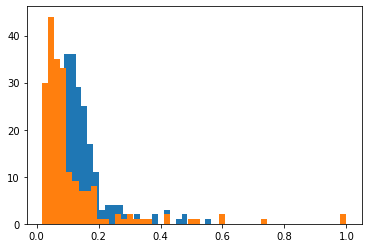

In [29]:
plt.hist(avg_intensity_egln3/np.nanmax(avg_intensity_egln3), 50)
plt.hist(avg_intensity_npy/np.nanmax(avg_intensity_npy), 50)

In [836]:
avg_intensity

array([24.95022124, 40.51698552, 29.09375251, 29.70655193, 34.28772759,
       26.79298246, 32.11151902, 36.66856214, 31.12916451, 30.94487015,
       31.73982033, 43.42839613, 32.75322324, 35.283061  , 51.98990961,
       31.53225302, 40.76069519, 41.11062645, 40.17823601, 37.93169793,
       53.76939491, 42.54205998, 38.89276079, 35.80030759, 29.70721714,
       31.29138233, 26.49753248, 33.4169647 , 48.89624381, 35.60775862,
       37.37936089, 40.91992248, 38.84522526, 39.96567944, 38.72161887,
       36.22450535, 31.1216872 , 32.1789749 , 37.56818182, 31.7029703 ,
       25.12078545, 31.4352518 , 32.83067422, 29.86585859, 28.95391335,
       25.38526056, 25.26495726, 17.05158859, 32.95391705, 29.29847772,
       27.65829146, 29.2310909 , 29.20095163, 26.92653061, 24.15262701,
       27.38459205, 23.84102183, 27.70256569, 28.7169158 , 27.32855492,
       24.42166442, 29.33239191, 37.91411043, 29.01273972, 22.71582282,
       29.10530973, 25.72648526, 31.79910714, 31.79378318, 36.26

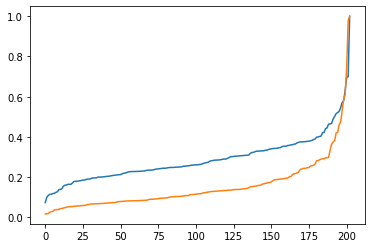

In [26]:
plt.plot(np.sort(avg_intensity_egln3)/np.nanmax(avg_intensity_egln3))
plt.plot(np.sort(avg_intensity_npy)/np.nanmax(avg_intensity_npy))

In [31]:
%matplotlib qt

In [32]:
plt.scatter(avg_intensity_egln3/np.max(avg_intensity_egln3), avg_intensity_npy/np.max(avg_intensity_npy), color = 'k', marker = 'o',
           alpha = 0.2)


plt.xlabel('Relative expression of Egln3')
plt.ylabel('Relative expression of Npy')

Text(0, 0.5, 'Relative expression of Npy')

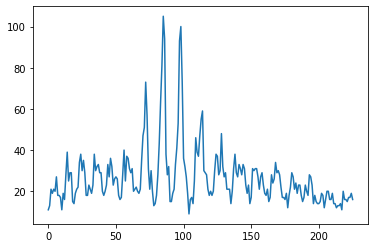

In [801]:
plt.plot(layer.data[plane, mask])

(0, 100)

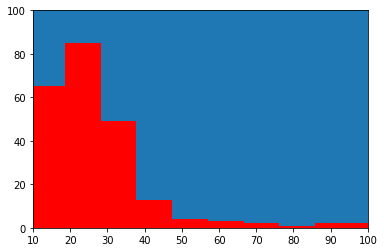

In [807]:
fig = plt.figure()
plt.hist(np.reshape(layer.data[plane, :, :], [-1]), 100)
plt.hist(layer.data[plane, mask], color = 'r')
plt.xlim(10, 100)
plt.ylim(0, 100)

In [806]:
layer.data[plane, mask]

array([ 11.,  13.,  21.,  19.,  21.,  20.,  27.,  18.,  18.,  17.,  11.,
        19.,  16.,  28.,  39.,  25.,  29.,  29.,  15.,  14.,  19.,  21.,
        22.,  34.,  38.,  30.,  35.,  29.,  18.,  18.,  23.,  21.,  19.,
        23.,  38.,  30.,  32.,  33.,  29.,  29.,  20.,  18.,  20.,  23.,
        33.,  27.,  36.,  32.,  23.,  26.,  27.,  26.,  18.,  16.,  17.,
        28.,  40.,  25.,  37.,  36.,  31.,  29.,  31.,  20.,  21.,  22.,
        20.,  19.,  21.,  35.,  47.,  51.,  73.,  57.,  31.,  21.,  30.,
        20.,  13.,  14.,  18.,  28.,  43.,  63.,  81., 105.,  94.,  38.,
        28.,  32.,  15.,  15.,  19.,  21.,  33.,  41.,  53.,  93., 100.,
        73.,  36.,  32.,  27.,  19.,   9.,  16.,  17.,  14.,  25.,  46.,
        39.,  37.,  47.,  55.,  59.,  30.,  29.,  28.,  21.,  18.,  20.,
        18.,  20.,  30.,  38.,  37.,  28.,  30.,  48.,  32.,  27.,  29.,
        21.,  21.,  21.,  14.,  20.,  31.,  38.,  29.,  27.,  33.,  31.,
        28.,  33.,  31.,  23.,  19.,  23.,  14.,  1

# View saved masks

In [22]:
with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(Cell.cell_data, f)

In [60]:
Cell.n_cells

In [58]:
indices = list(Cell.cell_data.keys())
Cell.cell_data[indices[-1]]

{'cell_id': 138,
 'z_planes': [5, 6],
 'masks': {5: array([[ 1792.17393846, 10372.95009818],
         [ 1789.68810237, 10383.72205456],
         [ 1796.59320261, 10392.28437886],
         [ 1805.43173093, 10399.74188713],
         [ 1817.30850335, 10404.16115128],
         [ 1832.77592789, 10407.19939539],
         [ 1845.20510833, 10414.65690365],
         [ 1855.97706471, 10403.60874326],
         [ 1852.66261659, 10388.41752273],
         [ 1845.48131234, 10375.15973026],
         [ 1835.814172  , 10366.87360997],
         [ 1826.14703166, 10363.00675383],
         [ 1818.41331938, 10360.24471373],
         [ 1805.70793494, 10359.96850972],
         [ 1800.46005875, 10362.73054982],
         [ 1800.46005875, 10362.73054982]]),
  6: array([[ 1806.81275097, 10392.28437886],
         [ 1815.09887127, 10401.6753152 ],
         [ 1824.76601161, 10409.13282346],
         [ 1832.49972388, 10409.13282346],
         [ 1839.68102814, 10400.29429515],
         [ 1840.50964016, 10385.37927862],

In [52]:
cell1.masks

{0: array([[ 2503.06063306, 11088.27194031],
        [ 2500.96184674, 11094.14854202],
        [ 2499.28281768, 11105.06223091],
        [ 2499.70257495, 11113.03761894],
        [ 2512.29529289, 11115.55616253],
        [ 2521.52995272, 11117.65494886],
        [ 2531.60412708, 11117.23519159],
        [ 2545.45611683, 11113.45737621],
        [ 2555.11053392, 11108.42028903],
        [ 2559.30810657, 11098.34611467],
        [ 2562.66616469, 11088.69169757],
        [ 2558.88834931, 11078.61752322],
        [ 2548.81417495, 11073.58043604],
        [ 2542.93757324, 11071.06189245],
        [ 2529.50534076, 11071.06189245],
        [ 2521.11019546, 11075.2594651 ],
        [ 2507.67796298, 11078.61752322]]),
 1: array([[ 2497.60378862, 11095.82757108],
        [ 2495.5050023 , 11108.00053176],
        [ 2503.48039033, 11113.03761894],
        [ 2513.55456469, 11113.45737621],
        [ 2525.30776811, 11114.716648  ],
        [ 2537.06097153, 11113.03761894],
        [ 2545.03635956, 1

In [143]:
# Check number of masks per cell, and variance of mask centers
indices = list(Cell.cell_data.keys())
n_planes = np.zeros(len(indices)).astype(int)
var_masks = np.zeros([len(indices), 2])

if not np.max(indices) == len(indices):
    print('Re-numbering cells to be consecutive')
    Cell.cell_data_temp = {}
    for i in range(len(indices)):
        Cell.cell_data_temp[i + 1] = Cell.cell_data[indices[i]]
        Cell.cell_data_temp[i + 1]['cell_id'] = i + 1
    Cell.cell_data = Cell.cell_data_temp 
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(Cell.cell_data, f)
        
for i in range(len(indices)):
    z_planes = Cell.cell_data[i + 1]['z_planes']
    n_planes[i] = len(z_planes)
    masks = Cell.cell_data[i + 1]['masks']
    centers = np.zeros([n_planes[i], 2])
    for j in range(n_planes[i]):
        centers[j, 0] = np.mean(masks[z_planes[j]][:, 0])
        centers[j, 1] = np.mean(masks[z_planes[j]][:, 1])
    var_masks[i, 0] = np.var(centers[:, 0])
    var_masks[i, 1] = np.var(centers[:, 1])
    
    

Re-numbering cells to be consecutive


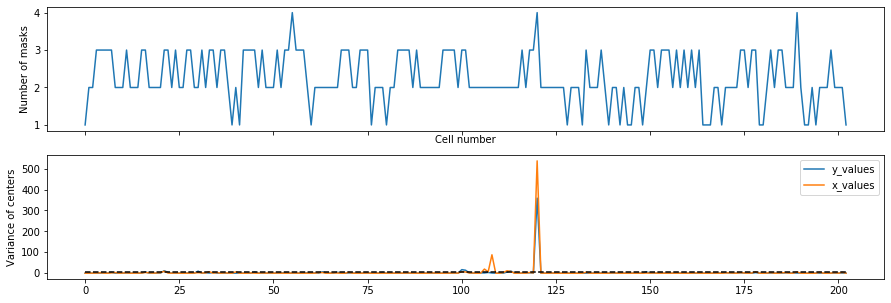

In [144]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = [15, 5])
ax[0].plot(n_planes)
ax[0].set_xlabel('Cell number')
ax[0].set_ylabel('Number of masks')
ax[1].plot(var_masks[:, 0], label = 'y_values')
ax[1].plot(var_masks[:, 1], label = 'x_values')
ax[1].set_ylabel('Variance of centers')
ax[1].plot(range(len(indices)), np.ones(len(indices))*8, '--', color = 'k')
ax[1].legend()

In [145]:
ind = np.nonzero(var_masks > 50)[0]

In [146]:
ind

array([108, 120, 120], dtype=int64)

In [147]:
cell_no = ind[2] + 1
masks = Cell.cell_data[cell_no]['masks']
masks

{14: array([[763.45916438, 911.99920008],
        [758.9540603 , 911.99920008],
        [756.79944531, 913.17444462],
        [755.23245258, 915.91668188],
        [755.23245258, 921.00940823],
        [755.82007485, 926.68975685],
        [759.54168257, 926.10213458],
        [762.47979393, 924.53514186],
        [765.61377937, 922.77227505],
        [767.37664619, 919.6382896 ],
        [767.96426846, 915.13318552],
        [767.57252028, 913.17444462]]),
 15: array([[799.6958711 , 865.38116656],
        [796.95363384, 866.16466292],
        [794.79901884, 868.51515201],
        [792.44852976, 870.08214473],
        [792.84027794, 874.19550063],
        [794.79901884, 876.9377379 ],
        [797.34538202, 878.30885653],
        [799.6958711 , 877.91710835],
        [801.65461201, 875.76249335],
        [803.61335291, 873.60787836],
        [805.18034563, 871.45326336],
        [805.18034563, 866.7522852 ],
        [804.78859745, 865.18529247],
        [804.00510109, 864.40179611]]),


In [120]:
Cell.cell_data.pop(cell_no)

{'cell_id': 30,
 'z_planes': [16, 17, 15],
 'masks': {16: array([[1080.85613872,  561.65899275],
         [1077.43598525,  561.45780725],
         [1074.21701728,  562.26254925],
         [1072.80871879,  564.87796072],
         [1076.22887226,  568.70048519],
         [1079.64902573,  572.32182416],
         [1081.86206621,  574.33367914],
         [1084.67866318,  574.13249364],
         [1086.48933267,  571.71826766],
         [1087.49526016,  568.29811419],
         [1086.69051816,  565.48151722],
         [1086.08696167,  564.27440423],
         [1085.48340517,  563.26847674]]),
  17: array([[1083.87392119,  563.06729124],
         [1079.24665473,  562.66492024],
         [1074.01583178,  562.86610574],
         [1070.79686381,  565.88388821],
         [1069.99212181,  568.70048519],
         [1072.0039768 ,  572.92538065],
         [1076.83242875,  574.93723563],
         [1080.45376772,  575.13842113],
         [1083.47155019,  574.53486464],
         [1085.68459067,  572.925380

## View saved masks in new napari window

In [326]:
# Open image in napari viewer - each channel as a separate layer 
viewer2 = napari.Viewer()

viewer2.add_image(im_array2[:, :, :], name = 'Channel {0}'.format(i + 1), colormap = 'viridis', 
                     interpolation = 'nearest')
    
indices = list(Cell.cell_data.keys())
viewer2.add_shapes(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)
mask_layer = viewer2.layers['Shapes']
for cell in indices:
    plane = Cell.cell_data[cell]['z_planes'][0]
    mask = Cell.cell_data[cell]['masks'][plane]
    mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

In [303]:
mask_layer.add()

{1: {'cell_id': 1,
  'z_planes': [1],
  'masks': {1: array([[1203.88111044,  337.39930311],
          [1200.28185564,  338.59905471],
          [1197.08251804,  342.39826811],
          [1195.68280784,  345.19768851],
          [1199.28206264,  347.79715031],
          [1203.08127604,  349.59677772],
          [1206.88048944,  350.39661212],
          [1209.47995124,  348.99690192],
          [1211.47953724,  346.59739871],
          [1211.27957864,  342.99814391],
          [1208.48015824,  339.19893051],
          [1207.68032384,  338.19913751]])},
  'no_planes': 1,
  'c_vals': array([0.])},
 2: {'cell_id': 2,
  'z_planes': [1, 2],
  'masks': {1: array([[1211.33317027,  392.72244235],
          [1208.9794914 ,  393.21279212],
          [1208.48914163,  394.87998132],
          [1208.88142144,  398.41049963],
          [1209.96019093,  401.64680808],
          [1211.72545008,  403.41206723],
          [1214.17719891,  404.39276676],
          [1216.92315759,  405.47153624],
          